# Clasificación con K-NN y Regresión Logística en Python
Este notebook replica el análisis y modelos del script en R utilizando Python.

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# 1. Lectura del dataset
# Cargar los datos
data = pd.read_csv('Alzheimer_dataset.csv', sep=';')

# Eliminar la columna 'Categoria'
data = data.drop(columns=['Categoria'])

# Exploración inicial
print(data.info())  # Estructura del dataset
print(data.describe())  # Resumen estadístico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               1000 non-null   float64
 1   Tiempo_Reaccion_1  1000 non-null   float64
 2   Sexo               1000 non-null   int64  
 3   Grupo_Estudio      1000 non-null   int64  
 4   Medicion_1         1000 non-null   float64
 5   Medicion_2         1000 non-null   float64
 6   Medicion_3         1000 non-null   float64
 7   Medicion_4         1000 non-null   int64  
 8   Medicion_5         1000 non-null   float64
 9   Target             1000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 78.3 KB
None
              Edad  Tiempo_Reaccion_1         Sexo  Grupo_Estudio  \
count  1000.000000        1000.000000  1000.000000    1000.000000   
mean     50.161279          49.860363     0.506000       1.939000   
std       9.916950          29.220158     0.500214     

Target
0    507
1    493
Name: count, dtype: int64


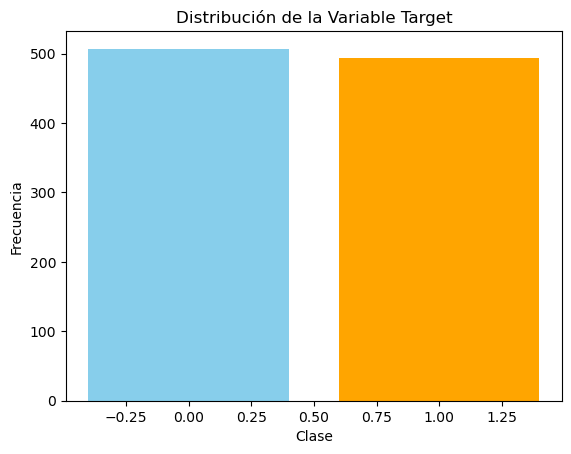

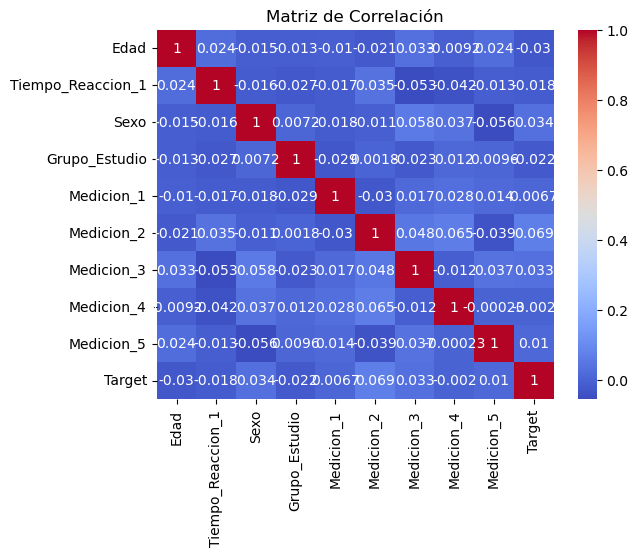

In [6]:
# 2. Análisis exploratorio (EDA)
# Comprobar distribución de la variable objetivo (Target)
print(data['Target'].value_counts())  # Frecuencia de cada clase

# Distribución de la variable objetivo
plt.bar(data['Target'].value_counts().index, data['Target'].value_counts().values, color=['skyblue', 'orange'])
plt.title('Distribución de la Variable Target')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de correlaciones entre variables numéricas
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

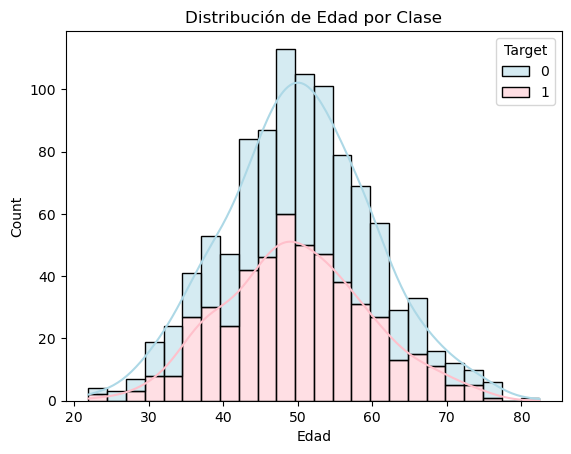

/var/folders/fl/srgrfg_x7z9fmfrsj6813vcm0000gn/T/ipykernel_5072/4108374370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Target', y='Edad', palette=['lightblue', 'pink'])


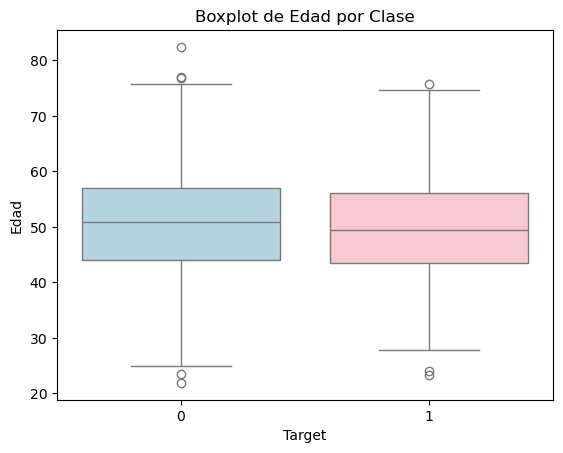

In [8]:
# Distribución de Edad por clases de Target
sns.histplot(data=data, x='Edad', hue='Target', kde=True, multiple='stack', palette=['lightblue', 'pink'])
plt.title('Distribución de Edad por Clase')
plt.show()

# Boxplot de Edad por Clase
sns.boxplot(data=data, x='Target', y='Edad', palette=['lightblue', 'pink'])
plt.title('Boxplot de Edad por Clase')
plt.show()

In [10]:
# 3. Preparación de los datos
# Convertir la variable Target a numérica (si no lo es)
data['Target'] = LabelEncoder().fit_transform(data['Target'])

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 4. Modelo de K-NN
# Entrenar un modelo K-NN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_knn = knn.predict(X_test_scaled)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Matriz de Confusión K-NN:\n', conf_matrix_knn)
print('Reporte de Clasificación K-NN:\n', classification_report(y_test, y_pred_knn))

Matriz de Confusión K-NN:
 [[81 66]
 [90 63]]
Reporte de Clasificación K-NN:
               precision    recall  f1-score   support

           0       0.47      0.55      0.51       147
           1       0.49      0.41      0.45       153

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300



In [14]:
# 5. Modelo de Regresión Logística
# Entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_log = log_reg.predict(X_test_scaled)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print('Matriz de Confusión Regresión Logística:\n', conf_matrix_log)
print('Reporte de Clasificación Regresión Logística:\n', classification_report(y_test, y_pred_log))

Matriz de Confusión Regresión Logística:
 [[84 63]
 [92 61]]
Reporte de Clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.48      0.57      0.52       147
           1       0.49      0.40      0.44       153

    accuracy                           0.48       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.48      0.48      0.48       300



In [16]:
# 6. Conclusión
print('Resumen de Precisión:')
print('K-NN - Precisión:', knn.score(X_test_scaled, y_test))
print('Regresión Logística - Precisión:', log_reg.score(X_test_scaled, y_test))

Resumen de Precisión:
K-NN - Precisión: 0.48
Regresión Logística - Precisión: 0.48333333333333334
